# Weyl Lewis Papapetrou Metric
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 11th, 2022

I"m embarassed to admit I have no idea where I got this metric.... find paper.... Not finished, go back and find last field equation

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,z,phi,dt,drho,dz,dphi = symbols('t rho z phi dt drho dz dphi')

In [4]:
f = Function('f')(rho,z)
f

In [5]:
gamma = Function('gamma')(rho,z)
gamma

In [6]:
omega = Function('omega')(rho,z)
omega

In [7]:
variables = Matrix([t,rho,z,phi])
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢z⎥
⎢ ⎥
⎣φ⎦

In [8]:
differentials = Matrix([dt,drho,dz,dphi])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢ dz ⎥
⎢    ⎥
⎣dphi⎦

In [17]:
#  Comopare Griffiths Podolsky page 238 :POSTIVE  A THERE CORRESPONDS TO MINUS OMEGA HERE 
lineElement = expand( (1/f)* (exp(2*gamma)*(drho**2+ dz**2) + rho**2 * dphi**2)-f*(dt - omega * dphi)**2)
lineElement

In [18]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡   -f(ρ, z)          0           0            f(ρ, z)⋅ω(ρ, z)      ⎤
⎢                                                                   ⎥
⎢                  2⋅γ(ρ, z)                                        ⎥
⎢                 ℯ                                                 ⎥
⎢       0         ──────────      0                   0             ⎥
⎢                  f(ρ, z)                                          ⎥
⎢                                                                   ⎥
⎢                              2⋅γ(ρ, z)                            ⎥
⎢                             ℯ                                     ⎥
⎢       0             0       ──────────              0             ⎥
⎢                              f(ρ, z)                              ⎥
⎢                                                                   ⎥
⎢                                             2                     ⎥
⎢                                            ρ               2      ⎥
⎢f(ρ, z)⋅ω(ρ, z)    

In [19]:
import sympy

In [20]:
m = sympy.Array(g)
m

⎡   -f(ρ, z)          0           0            f(ρ, z)⋅ω(ρ, z)      ⎤
⎢                                                                   ⎥
⎢                  2⋅γ(ρ, z)                                        ⎥
⎢                 ℯ                                                 ⎥
⎢       0         ──────────      0                   0             ⎥
⎢                  f(ρ, z)                                          ⎥
⎢                                                                   ⎥
⎢                              2⋅γ(ρ, z)                            ⎥
⎢                             ℯ                                     ⎥
⎢       0             0       ──────────              0             ⎥
⎢                              f(ρ, z)                              ⎥
⎢                                                                   ⎥
⎢                                             2                     ⎥
⎢                                            ρ               2      ⎥
⎢f(ρ, z)⋅ω(ρ, z)    

In [21]:
from einsteinpy.symbolic import *

In [22]:
syms = sympy.symbols("t rho z phi")
t,rho,z,phi = syms

In [23]:
metric = MetricTensor(m,syms)

In [24]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡                                                             ∂              2             
⎢⎢                                                             ──(f(ρ, z))   f (ρ, z)⋅ω(ρ, z
⎢⎢                                                             ∂ρ                           
⎢⎢                    0                                        ─────────── + ───────────────
⎢⎢                                                              2⋅f(ρ, z)                   
⎢⎢                                                                                       2⋅ρ
⎢⎢                                                                                          
⎢⎢∂              2               ∂                                                          
⎢⎢──(f(ρ, z))   f (ρ, z)⋅ω(ρ, z)⋅──(ω(ρ, z))                                                
⎢⎢∂ρ                             ∂ρ                                                         
⎢⎢─────────── + ────────────────────────────                          

In [25]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

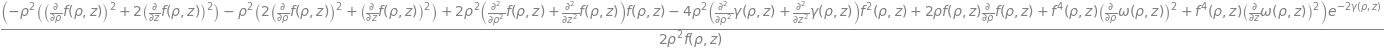

In [26]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [27]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [28]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [29]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [30]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [31]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

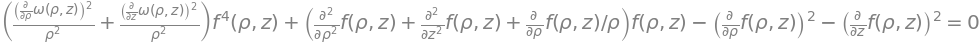

In [62]:
#  Corresponds to equation 13.7a Page 246 Griffiths Podolsky 
fequation = Eq(collect( expand( (1/rho**2)*ricciSimplified[0,0].args[2] ) , f),0)
fequation

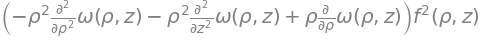

In [46]:
collect( ricciSimplified[0,3].args[2], f ).args[0]

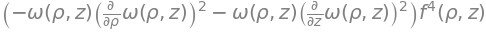

In [47]:
collect( ricciSimplified[0,3].args[2], f ).args[1]

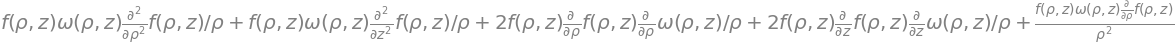

In [49]:
#  Corresponds to equation 13.7b Page 246 Griffiths Podolsky BUT NOT CORRECT YET!!!!
expand((-1/rho**3)*collect( ricciSimplified[0,3].args[2], f ).args[2])

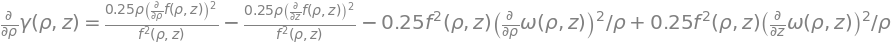

In [54]:
#  Corresponds to equation 13.8a Page 246 Griffiths Podolsky
dgammadrho = Eq(diff(gamma,rho),expand(solve( einsteinSimplified[2,2], diff(gamma,rho))[0]))
dgammadrho

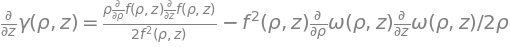

In [58]:
#  Corresponds to equation 13.8b Page 246 Griffiths Podolsky
dgammadz = Eq( diff(gamma,z), expand( solve( ricciSimplified[2,1], diff(gamma,z) )[0] ))
dgammadz

In [63]:
vacuumFieldEquations = Matrix([fequation,dgammadrho,dgammadz])
vacuumFieldEquations

⎡⎛             2                2⎞                                                          
⎢⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟            ⎛                              ∂          ⎞   
⎢⎜⎜──(ω(ρ, z))⎟    ⎜──(ω(ρ, z))⎟ ⎟            ⎜  2              2            ──(f(ρ, z))⎟   
⎢⎜⎝∂ρ         ⎠    ⎝∂z         ⎠ ⎟  4         ⎜ ∂              ∂             ∂ρ         ⎟   
⎢⎜────────────── + ──────────────⎟⋅f (ρ, z) + ⎜───(f(ρ, z)) + ───(f(ρ, z)) + ───────────⎟⋅f(
⎢⎜       2                2      ⎟            ⎜  2              2                 ρ     ⎟   
⎢⎝      ρ                ρ       ⎠            ⎝∂ρ             ∂z                        ⎠   
⎢                                                                                           
⎢                                        2                       2                          
⎢                           ⎛∂          ⎞           ⎛∂          ⎞          2       ⎛∂       
⎢                    0.25⋅ρ⋅⎜──(f(ρ, z))⎟    0.25⋅ρ⋅⎜──(f(ρ, z))⎟    0

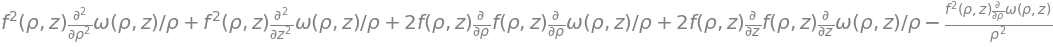

In [70]:
#  This is just typed in to see if we get the same thing
griffithseq13pt7b = diff( ( rho**-1 * f**2 * diff(omega,rho) ), rho ) + diff( ( rho**-1 * f**2 * diff(omega,z) ), z ) 
griffithseq13pt7b

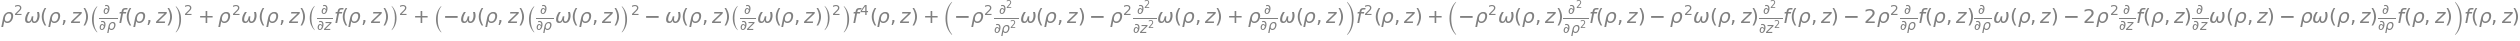

In [75]:
collect(ricciSimplified[3,0].args[2],f).args